In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("DataSets/50_Startups.csv")

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


# Checking for Missing Values

In [5]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

# Checking for Outliers

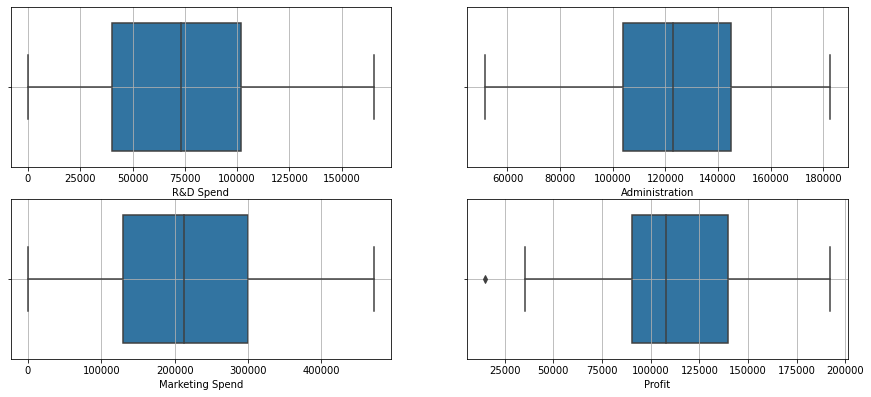

In [6]:
plt.figure(figsize=(15,10))
plt.subplot(3,2,1)
sns.boxplot(df['R&D Spend'])
plt.grid()

plt.subplot(3,2,2)
sns.boxplot(df['Administration'])
plt.grid()

plt.subplot(3,2,3)
sns.boxplot(df['Marketing Spend'])
plt.grid()

plt.subplot(3,2,4)
sns.boxplot(df['Profit'])
plt.grid()

plt.show()

In [7]:
df[df["Profit"] < 25000]

,R&D Spend,Administration,Marketing Spend,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


# Handling Categorical Data

In [8]:
df.State.value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder
df.State = LabelEncoder().fit_transform(df.State)

In [10]:
df.sample(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
31,61136.38,152701.92,88218.23,2,97483.56
44,22177.74,154806.14,28334.72,0,65200.33
3,144372.41,118671.85,383199.62,2,182901.99
25,64664.71,139553.16,137962.62,0,107404.34
32,63408.86,129219.61,46085.25,0,97427.84


# Splitting the Data (X,Y)

In [11]:
X = df.iloc[:,:-1]
X.sample(5)

,R&D Spend,Administration,Marketing Spend,State
26,75328.87,144135.98,134050.07,1
19,86419.70,153514.11,0.00,2
39,38558.51,82982.09,174999.30,0
36,28663.76,127056.21,201126.82,1
6,134615.46,147198.87,127716.82,0


In [12]:
Y = df.iloc[:,-1]
Y.sample(5)

24    108552.04
42     71498.49
30     99937.59
8     152211.77
3     182901.99
Name: Profit, dtype: float64

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

# Model Building

In [14]:
# Importing Model
from sklearn.linear_model import LinearRegression

# Initializing the Model
model = LinearRegression()

# Fitting the Model
model.fit(X_train,Y_train)

# Predict using the Model
Y_pred = model.predict(X_test)

In [15]:
# checking Accuarcy & Loss Functions
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

r2   =  r2_score(Y_test,Y_pred)
mae  =  mean_absolute_error(Y_test,Y_pred)
mse  =  mean_squared_error(Y_test,Y_pred)
rmse =  np.sqrt(mean_squared_error(Y_test,Y_pred))

print("R2   : ",round(r2,2))
print("MAE  : ",round(mae,2))
print("MSE  : ",round(mse,2))
print("RMSE : ",round(rmse,2))

R2   :  0.96
MAE  :  7697.66
MSE  :  79447889.48
RMSE :  8913.35


In [16]:
model.coef_             # - Weights

array([ 7.73632191e-01, -9.41863371e-03,  2.93451013e-02,  1.73159640e+02])

In [17]:
model.intercept_       # - Constant

49637.34362243092